In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Mac OS 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [14]:
data = pd.read_csv('fulldata.csv', encoding='cp949')
print(data.head())

/var/folders/pq/9q4y5g9n38q6vksdkz564k940000gn/T/ipykernel_76670/3139674715.py:1: DtypeWarning: Columns (11,39,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('fulldata.csv', encoding='cp949')


   번호 개방서비스명    개방서비스아이디  개방자치단체코드                    관리번호       인허가일자  \
0   1  휴게음식점  07_24_05_P   3490000  3490000-104-2024-00154  2024-12-02   
1   2  휴게음식점  07_24_05_P   3170000  3170000-104-2025-00001  2025-01-06   
2   3  휴게음식점  07_24_05_P   3410000  3410000-104-2025-00021  2025-01-21   
3   4  휴게음식점  07_24_05_P   4040000  4040000-104-2025-00011  2025-01-21   
4   5  휴게음식점  07_24_05_P   4040000  4040000-104-2025-00010  2025-01-21   

   인허가취소일자  영업상태구분코드 영업상태명  상세영업상태코드  ... 공장생산직직원수 건물소유구분명  보증액  월세액  \
0      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   
1      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   
2      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   
3      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   
4      NaN         3    폐업         2  ...      0.0     NaN  0.0  0.0   

   다중이용업소여부  시설총규모  전통업소지정번호 전통업소주된음식 홈페이지 Unnamed: 47  
0         N   0.00       NaN      NaN  NaN         NaN  
1       

In [15]:
print(data.columns.tolist())
print(data.columns.values)

['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호', '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보x(epsg5174)', '좌표정보y(epsg5174)', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총직원수', '본사직원수', '공장사무직직원수', '공장판매직직원수', '공장생산직직원수', '건물소유구분명', '보증액', '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지', 'Unnamed: 47']
['번호' '개방서비스명' '개방서비스아이디' '개방자치단체코드' '관리번호' '인허가일자' '인허가취소일자' '영업상태구분코드'
 '영업상태명' '상세영업상태코드' '상세영업상태명' '폐업일자' '휴업시작일자' '휴업종료일자' '재개업일자' '소재지전화'
 '소재지면적' '소재지우편번호' '소재지전체주소' '도로명전체주소' '도로명우편번호' '사업장명' '최종수정시점' '데이터갱신구분'
 '데이터갱신일자' '업태구분명' '좌표정보x(epsg5174)' '좌표정보y(epsg5174)' '위생업태명' '남성종사자수'
 '여성종사자수' '영업장주변구분명' '등급구분명' '급수시설구분명' '총직원수' '본사직원수' '공장사무직직원수'
 '공장판매직직원수' '공장생산직직원수' '건물소유구분명' '보증액' '월세액' '다중이용업소여부' '시설총규모' '전통업소지정번호'
 '전통업소주된음식' '홈페이지' 'Unnamed: 47']


/var/folders/pq/9q4y5g9n38q6vksdkz564k940000gn/T/ipykernel_76670/915718221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_4.loc[:, '시군구'] = data_4['소재지전체주소'].str.split().str[1]


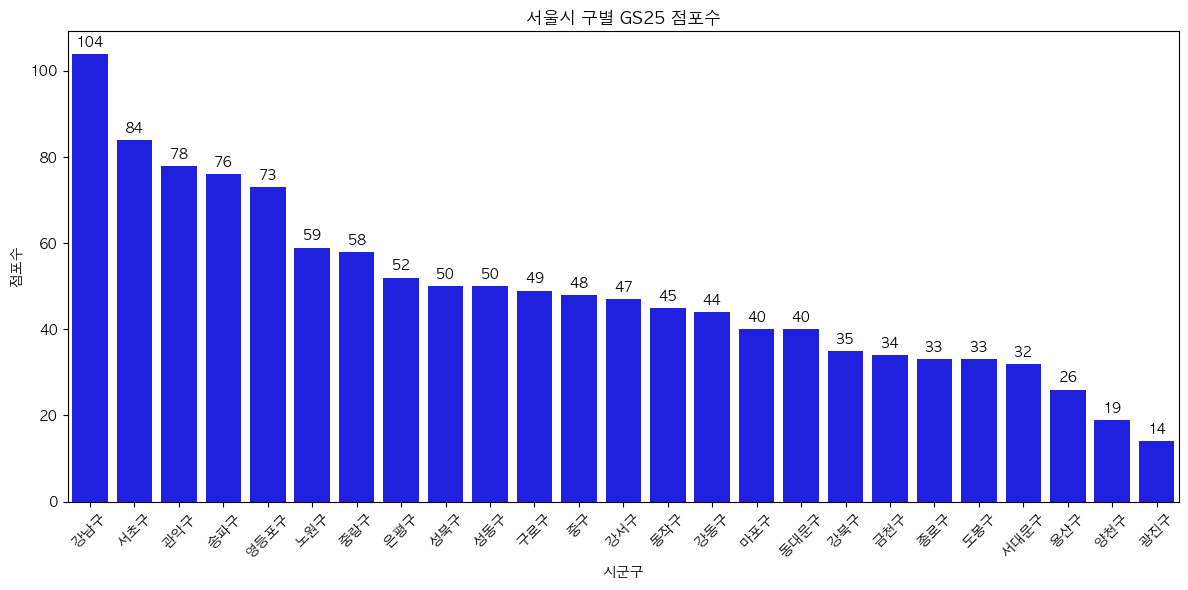

In [ ]:
data_1 = data[['번호', '영업상태명', '영업상태구분코드', '사업장명', '소재지전체주소', '도로명전체주소']]
data_2 = data_1[data_1['소재지전체주소'].str.contains('서울특별시', na=False)]
data_3 = data_2[data_2['사업장명'].str.contains('GS25')]
data_4 = data_3[data_3['영업상태명'].str.contains('영업')]
data_4.loc[:, '시군구'] = data_4['소재지전체주소'].str.split().str[1]
data_5 = data_4.groupby('시군구').size().reset_index(name='사업장수')

data_5_sorted = data_5.sort_values(by='사업장수', ascending=False)

plt.figure(figsize=(12,6))
ax = sns.barplot(x='시군구', y='사업장수', data=data_5_sorted, color='blue')

plt.title('서울시 구별 GS25 점포수')
plt.xlabel('시군구')
plt.ylabel('점포수')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0], padding=3, fontsize=10)


plt.tight_layout()
plt.show()


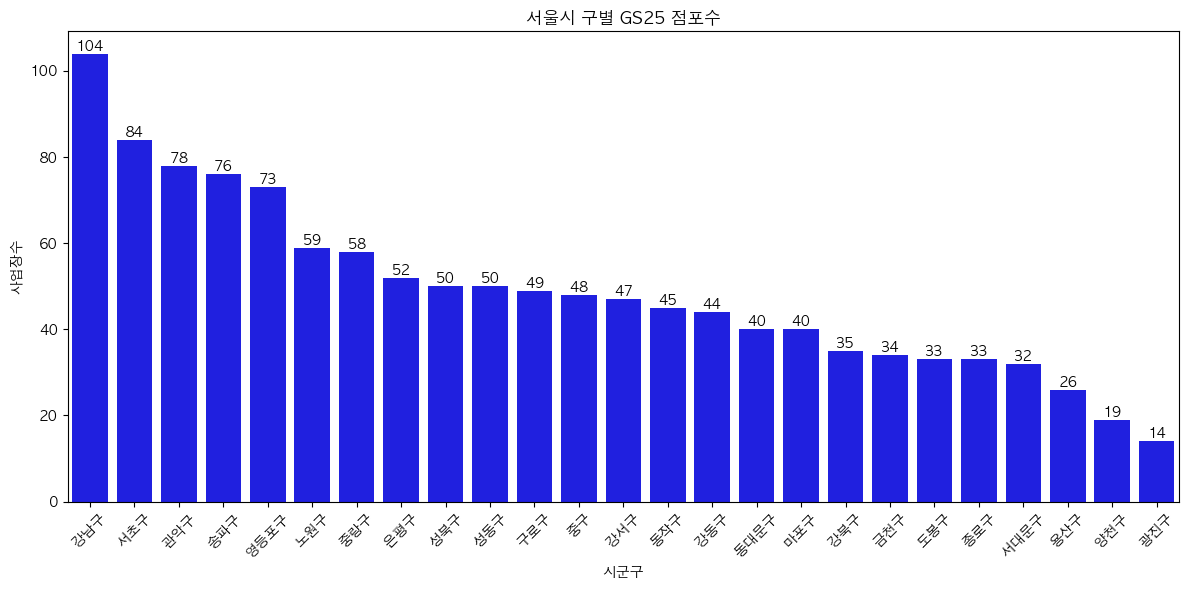

In [ ]:
data_gs25 = data[
    data['소재지전체주소'].str.contains('서울특별시', na=False) &
    data['사업장명'].str.contains('GS25', na=False) &
    data['영업상태명'].str.contains('영업', na=False)
].copy()

data_gs25['시군구'] = data_gs25['소재지전체주소'].str.split().str[1]

count_by_district = data_gs25['시군구'].value_counts().reset_index()
count_by_district.columns = ['시군구', '사업장수']

plt.figure(figsize=(12,6))
ax = sns.barplot(x='시군구', y='사업장수', data=count_by_district, color='blue')
plt.title('서울시 구별 GS25 점포수')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()